<p align='center'><img src='https://s32519.pcdn.co/wp-content/uploads/2016/06/blog-supermarket-inventory-management-1-1536x649.jpg.webp'/></p>

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### One day our Data scientist friend John visited a supermarket while chatting with the owner of the establishment he asked 

    John  : how much outlets do you have?
    Owner : around 10 or so,why do you ask?
    John  : Maintaining the sales and recording must be quite a task huh?
    Owner : well it is but we manage somehow.
    John  : Did you know that i can create a model that can predict the sales for you?
    Owner : what do you mean by a model?
    John  : Machine can predict sales for you?
    Owner : haha you are a funny man my friend,as if that is possible?
    John  : No it is possible.
    Owner : Here's a deal for you then if you can create something like that i will give you 50 % off on your next purchase.
    John  : Dont regret it later my friend.

#### So John begins his journey to achieve 50% off on his next purchase.

#### Step 1: Importing necessary libraries and the dataset

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

- pandas to deal with tabular data
- numpy for mathematical operations
- matplotlib and seaborn for visualizations
- warnings to avoid unnecessary messages
- % matplotlib inline to make sure the graphs and plots do not open in another window

In [46]:
file = "/content/drive/MyDrive/Colab Notebooks/projects/Big mart sales/Train.csv"
data = pd.read_csv(file)
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


- we will create a copy of the file to make sure no changes happen to it.

In [47]:
df =data.copy()

- Independent Variable -
      'item_weight','item_visibility', 'item_type',item_mrp', outlet_identifier', 'outlet_establishment_year',
      'item_fat_content','outlet_size', 'outlet_location_type', 'outlet_type'

- Dependent variable - 
      'Item_outlet_sale'



In [48]:
df.shape

(8523, 12)

- we have 8523 rows with 12 features
- we can drop the item_identifier column since it is an identification tag for our products which wont be much of an help

In [49]:
df.drop('Item_Identifier',axis=1,inplace=True)

- let us convert all the column names into lowercase for easier analysis

In [50]:
df.columns = df.columns.str.lower()
df.columns

Index(['item_weight', 'item_fat_content', 'item_visibility', 'item_type',
       'item_mrp', 'outlet_identifier', 'outlet_establishment_year',
       'outlet_size', 'outlet_location_type', 'outlet_type',
       'item_outlet_sales'],
      dtype='object')

    In the item_fat_content columns some of our rows have been taken down in a shortform which needs to be converted 

In [51]:
df['item_fat_content'].mask(df['item_fat_content'] == 'LF','Low Fat',inplace=True)
df['item_fat_content'].mask(df['item_fat_content'] == 'reg','Regular',inplace=True)
df['item_fat_content'].mask(df['item_fat_content'] == 'low fat','Low Fat',inplace=True)

In [52]:
df.item_fat_content.unique()

array(['Low Fat', 'Regular'], dtype=object)

- let us check for any duplications

In [53]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False])

- then you check for the datatypes of our data

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_weight                7060 non-null   float64
 1   item_fat_content           8523 non-null   object 
 2   item_visibility            8523 non-null   float64
 3   item_type                  8523 non-null   object 
 4   item_mrp                   8523 non-null   float64
 5   outlet_identifier          8523 non-null   object 
 6   outlet_establishment_year  8523 non-null   int64  
 7   outlet_size                6113 non-null   object 
 8   outlet_location_type       8523 non-null   object 
 9   outlet_type                8523 non-null   object 
 10  item_outlet_sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


- we do not have any mistakes in our data,we could convert the year into datetime but we will let it be

In [55]:
df.describe()

,item_weight,item_visibility,item_mrp,outlet_establishment_year,item_outlet_sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


- we have some mising values in item_weight
- since the std(standard deviation) is not much close to the mean(average) we can expect some variations in the data

### Step 2: Missing values

In [56]:
df.isnull().sum().sum()

3873

In [57]:
missing = [feature for feature in df.columns if df[feature].isnull().sum() >0 ]
for feature in missing :
  print("-",feature,"has",np.round(df[feature].isnull().mean()*100,2),'% missing values')

- item_weight has 17.17 % missing values
- outlet_size has 28.28 % missing values


- the above code will iterate through all the columns in our dataset and check if it has any missing values in it and if it has it will tell us the percentage by rounding it to 2 places after the decimal

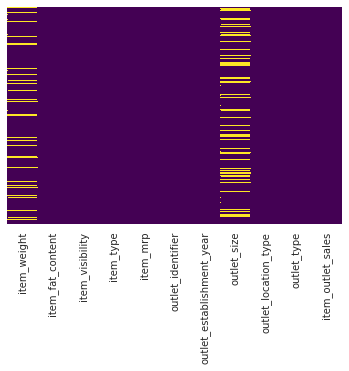

In [58]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

- visually we can see yellow color represents the missing values in the dataset

#### Relationship between the item_outlet_sales and missigng variables

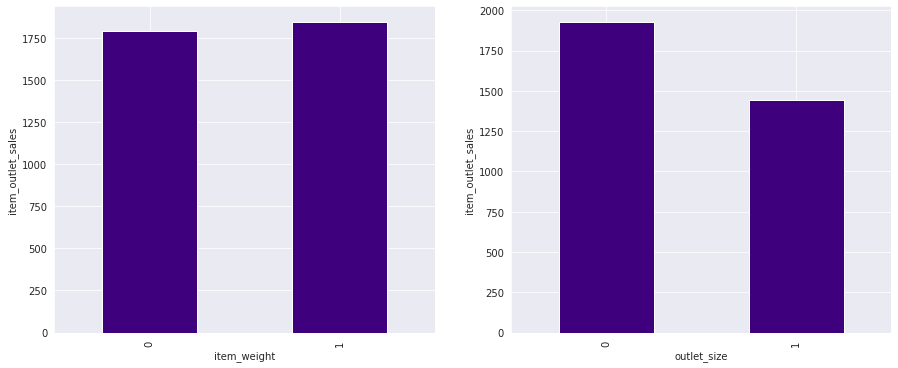

In [59]:
plt.figure(figsize =(15,6))
dataset = df.copy()
plt.subplot(1,2,1)
dataset['item_weight'] =np.where(dataset['item_weight'].isnull(),1,0)
dataset.groupby('item_weight')['item_outlet_sales'].median().plot.bar(cmap='Purples_r')
plt.ylabel('item_outlet_sales')

plt.subplot(1,2,2)
dataset['outlet_size'] =np.where(dataset['outlet_size'].isnull(),1,0)
dataset.groupby('outlet_size')['item_outlet_sales'].median().plot.bar(cmap='Purples_r')
plt.ylabel('item_outlet_sales')

plt.show()

Interpretations:
- in case of item weight if there is a null value present the item_outlet_sales is slightly high which is negligible 
- But in case of outlet_size if there is no missing value present then the item_outlet_Sales is higher compared to when there null values present

#### Checking if there is any null values pandas cannot detect

In [60]:
missing_val = ['-',"--"," ",".",",",";",":","*","!"]
missing_set = pd.read_csv(file,na_values = missing_val)
missing_set.isnull().sum().sum()

3873

- we do not have any extra missing values

### Step 3:Numeric variables

- In the simplest definition numerical variables are those which contains numbers in them(it could be float or an integer)

In [61]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != "O"]
numerical_features

['item_weight',
 'item_visibility',
 'item_mrp',
 'outlet_establishment_year',
 'item_outlet_sales']

#### Temporal variables

- when a feature has datetime value in it is called as a temporal variables

In [62]:
year_feature = [feature for feature in numerical_features if 'year' in feature]
year_feature

['outlet_establishment_year']

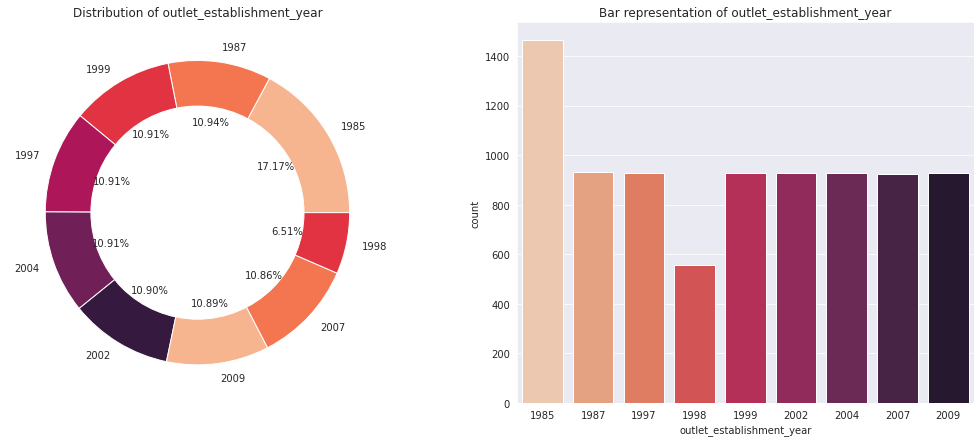

In [63]:
plt.figure(figsize = (18,7))
plt.subplot(1,2,1)
plt.pie(df['outlet_establishment_year'].value_counts(), 
        labels=df['outlet_establishment_year'].value_counts().index, 
        colors=sns.color_palette('rocket_r'), 
        autopct='%.2f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre)
plt.title('Distribution of outlet_establishment_year')

plt.subplot(1,2,2)
sns.countplot(df['outlet_establishment_year'],palette= 'rocket_r')
plt.title('Bar representation of outlet_establishment_year')
plt.show()

- Most outlets were created in the year 1985 and least outlets were created in the year 1998 after which there is a constant in the establishment of the outlets

#### Relationship between the year_feature and the dependent variable

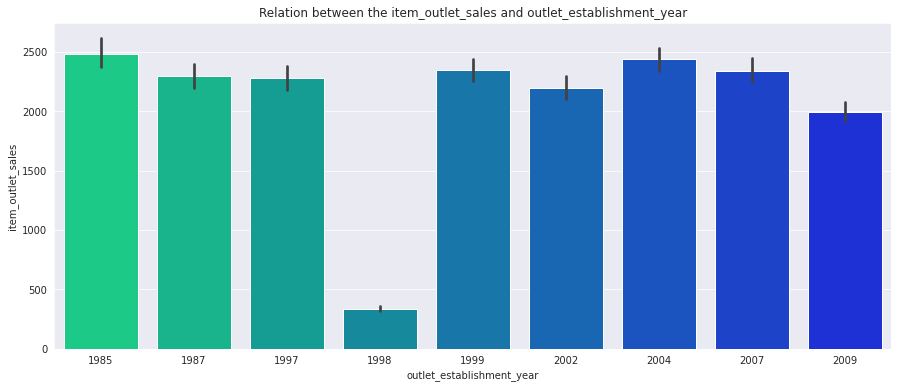

In [64]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,6))
sns.barplot(x= 'outlet_establishment_year',y = 'item_outlet_sales',data=df,palette='winter_r')
plt.title('Relation between the item_outlet_sales and outlet_establishment_year');

- as we can see from the graph even though there is a bit of overlap however we can say that there is significant difference in our sample
- the lowest sales happend in the year 1998 which is understandable.
- The highest sale happend on 1985 however we cannot be completely sure since there is a bit of overlap in standard deviation as shown in the above error bars

#### Discrete variables

- when a feature has finite number of values which can be easily counted it is called a discrete variables

In [65]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feature]
discrete_features

[]

- we do not have any discrete features

#### Continuos variables

- in contrast to discrete varibles when a feature has a infinite number of values in it which cannot be counted by one hand it is called continuos variables

In [66]:
continuos_features =[feature for feature in numerical_features if feature not in year_feature]
continuos_features

['item_weight', 'item_visibility', 'item_mrp', 'item_outlet_sales']

In [67]:
from scipy import stats
from scipy.stats import norm

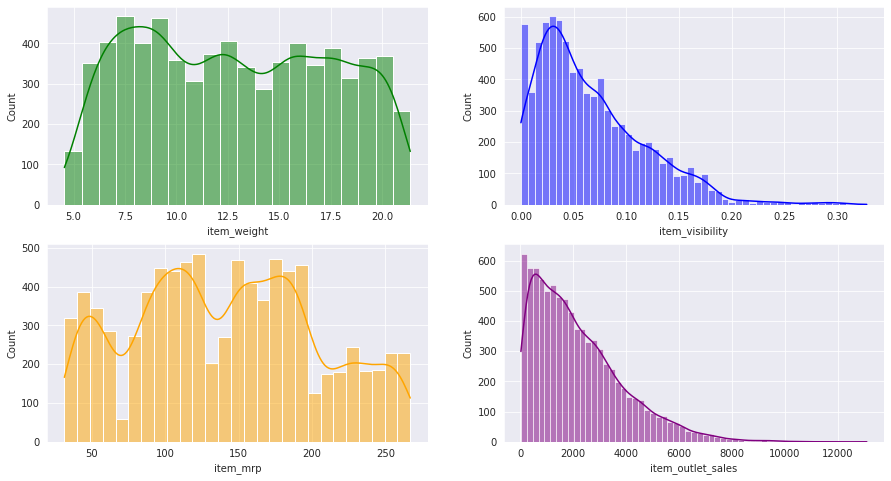

In [68]:
fig,axs = plt.subplots(2,2,figsize=(15,8))
sns.histplot(data=df,x='item_weight',kde=True,ax=axs[0,0],color='green')
sns.histplot(data=df,x='item_visibility',kde=True,ax=axs[0,1],color='blue')
sns.histplot(data=df,x='item_mrp',kde=True,ax=axs[1,0],color='orange')
sns.histplot(data=df,x='item_outlet_sales',kde=True,ax=axs[1,1],color='purple');

#### Let us see the skewness of our features


In [69]:
for feature in continuos_features:
  print(feature,":",np.round(df[feature].skew(),3))

item_weight : 0.082
item_visibility : 1.167
item_mrp : 0.127
item_outlet_sales : 1.178


- item_visibility and item_outlet_price are right skewed whereas the other two are somewhat normally distributed


#### let us see the kurtosis 

In [70]:
for feature in continuos_features:
  print(feature,":",np.round(df[feature].kurt(),3))

item_weight : -1.228
item_visibility : 1.679
item_mrp : -0.89
item_outlet_sales : 1.616


- same as before item_visibility and item_outlet_price have a higher peak compared to the other two

#### Let us do a tranformation and then check how the data will be distributed

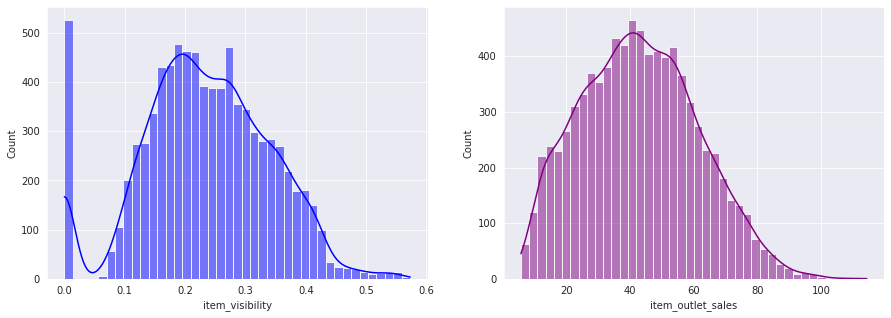

In [71]:
df2 = df.copy()
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df2['item_visibility'] = np.sqrt(df2['item_visibility'])
sns.histplot(data=df2,x='item_visibility',kde=True,color='blue')

plt.subplot(1,2,2)
df2['item_outlet_sales'] = np.sqrt(df2['item_outlet_sales'])
sns.histplot(data=df2,x='item_outlet_sales',kde=True,color='purple')
plt.show()

- so we can see that our feature is normally distributed after the transformation.
- since item_weight contains missing value we will impute with another value and then check for the distribution during the feature engineering

### Step 4:Outliers

- In the simplest terms an outlier is a value that completely differs from the rest of the values

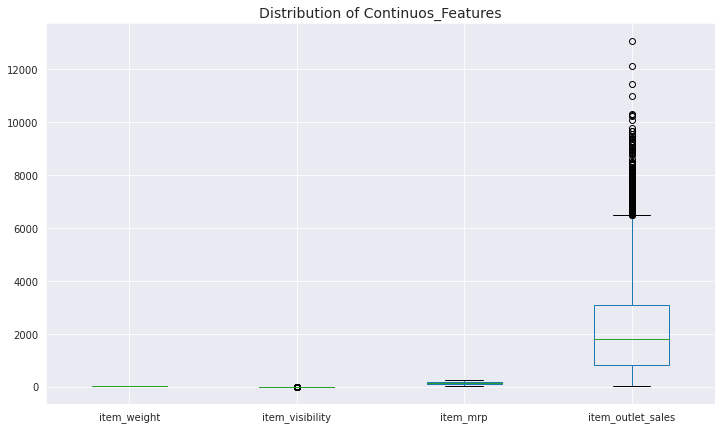

In [72]:
plt.figure(figsize=(12,7))
df[continuos_features].boxplot()
plt.title('Distribution of Continuos_Features',fontsize=14)
# plt.xticks(rotation = 'vertical', fontsize = 15)
plt.show()

- it seems the range of values of item_outlet_Sales very high compared to other features so it completely overlaps the other so we will exclude it and then check

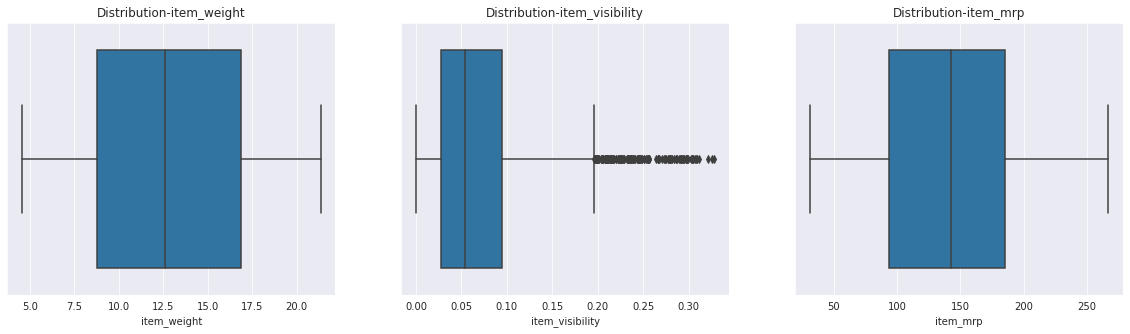

In [73]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(df['item_weight'])
plt.title('Distribution-item_weight')

plt.subplot(1,3,2)
sns.boxplot(df['item_visibility'])
plt.title('Distribution-item_visibility')

plt.subplot(1,3,3)
sns.boxplot(df['item_mrp'])
plt.title('Distribution-item_mrp')

plt.show()

- except for in item_visibility we do not have any outliers present

#### Let us apply transformation and check how the data will be

In [74]:
def log_transformation(feature):
  data = df.copy()
  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  sns.boxplot(data[feature])
  plt.title('Before Sqrt transformation')

  plt.subplot(1,2,2)
  data[feature] = np.sqrt(data[feature])
  sns.boxplot(data[feature])
  plt.title('After sqrt tranformation');

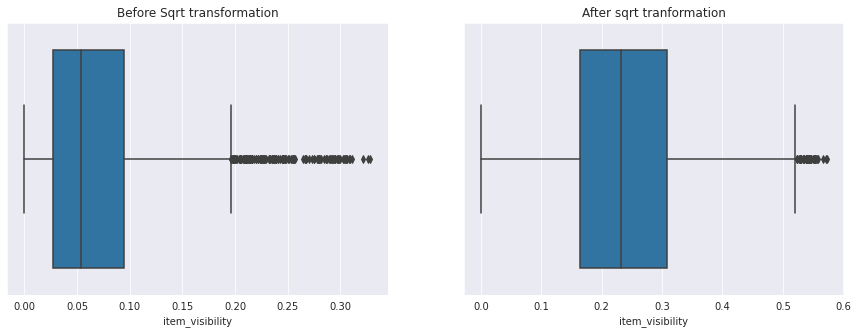

In [75]:
log_transformation('item_visibility')

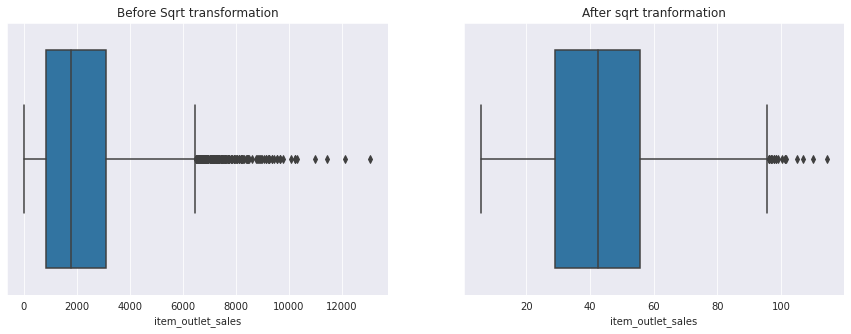

In [76]:
log_transformation('item_outlet_sales')

-  There is still quite a outliers present which can be reduced when we will transform it 

### Step 5: Categorical variables

 - categorical variables are those which has a limited number of values in it an example could be educational level,or soft drinks etc

In [77]:
categorical_features = [feature for feature in df.columns if df[feature].dtype =="O"]
categorical_features

['item_fat_content',
 'item_type',
 'outlet_identifier',
 'outlet_size',
 'outlet_location_type',
 'outlet_type']

In [78]:
df[categorical_features].head()

,item_fat_content,item_type,outlet_identifier,outlet_size,outlet_location_type,outlet_type
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [79]:
for feature in categorical_features:
  print(feature,":",df[feature].unique(),'unique values')

item_fat_content : ['Low Fat' 'Regular'] unique values
item_type : ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood'] unique values
outlet_identifier : ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019'] unique values
outlet_size : ['Medium' nan 'High' 'Small'] unique values
outlet_location_type : ['Tier 1' 'Tier 3' 'Tier 2'] unique values
outlet_type : ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3'] unique values


#### Ordinal variables

- ordinal variables are a type of categorical variables however they have an order to them eg: glass size : small,medium or large

In [80]:
ordinal_variables = df[['item_fat_content','outlet_size','outlet_location_type']]
ordinal_variables.head()

,item_fat_content,outlet_size,outlet_location_type
0,Low Fat,Medium,Tier 1
1,Regular,Medium,Tier 3
2,Low Fat,Medium,Tier 1
3,Regular,NaN,Tier 3
4,Low Fat,High,Tier 3


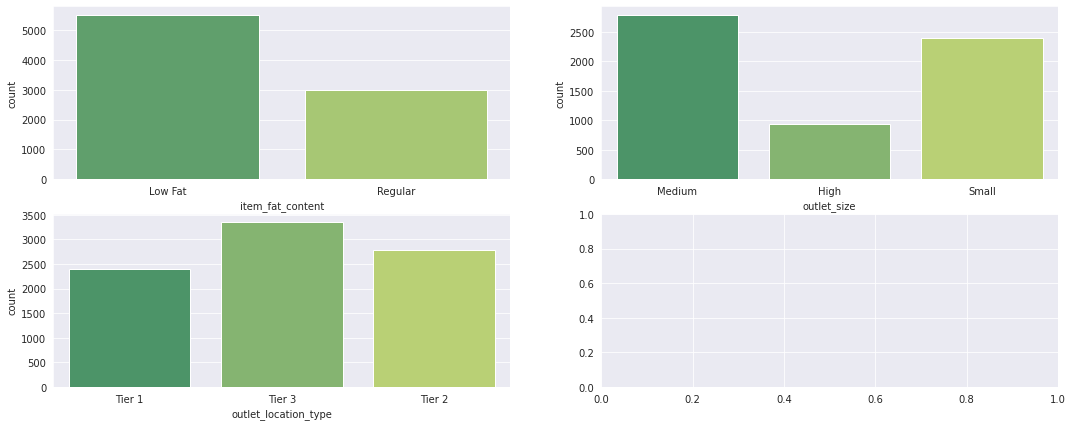

In [81]:
fig,ax = plt.subplots(2,2,figsize=(18,7))
for variable,subplot in zip(ordinal_variables,ax.flatten()):
  sns.countplot(variable,data=df,ax=subplot,palette ='summer')

Inferences:
- Low fat products are more than the regular ones
- when it comes to outlet_size medium is more preferred followed by small which is followed by large
- Coming to location_type tier3 is preferred over the other two
- And finally coming to outlet_type Supermarket type 1 is preferred followed by grocery store.

#### Relation between the ordinal variables and the item_outlet_sales

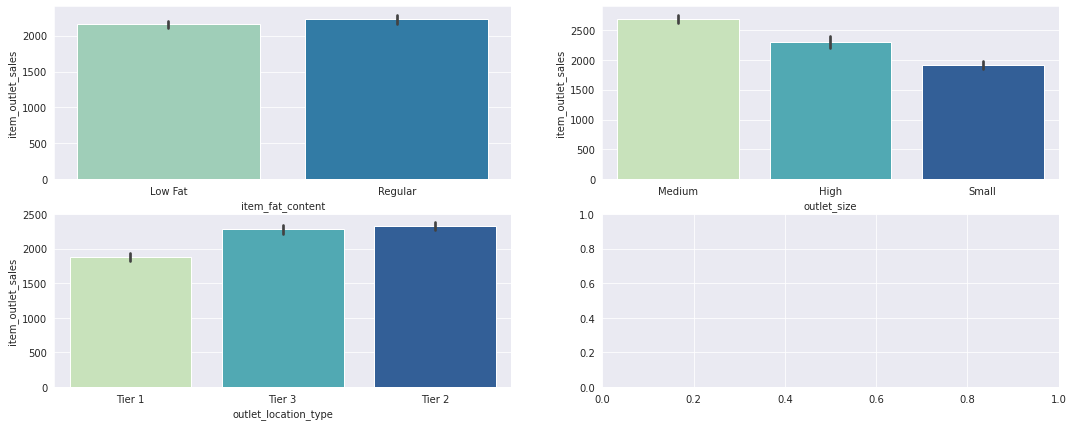

In [82]:
fig,ax = plt.subplots(2,2,figsize=(18,7))
for variable,subplot in zip(ordinal_variables,ax.flatten()):
  sns.barplot(x=variable,y='item_outlet_sales',data=df,ax=subplot,palette= 'YlGnBu')

Inferences:
- when it comes to item_fat_content there is not much of a difference between neither Low Fat or Regular,however from the error bars there seems to be some variation in the collected data
- Higest sales happen in outlets having medium sales which does not come as a surprise since that is the preferred size over all three
- Coming to outlet_location_type tier3 and tie2 are tied up when considering sales with some variations, with tier1 being the lowest one

      and finally as we checked before outlet_Size has some Null values present in it we need to impute it with other values and 
      then check the graph again if we will get the same results we will during feature engineering

#### Nominal variables

- i think we can guess what will nominal varibles means as you guessed it correctly it is a categorical variables with no order

In [83]:
nominal_variables = [feature for feature in categorical_features if feature not in ordinal_variables]
nominal_variables

['item_type', 'outlet_identifier', 'outlet_type']

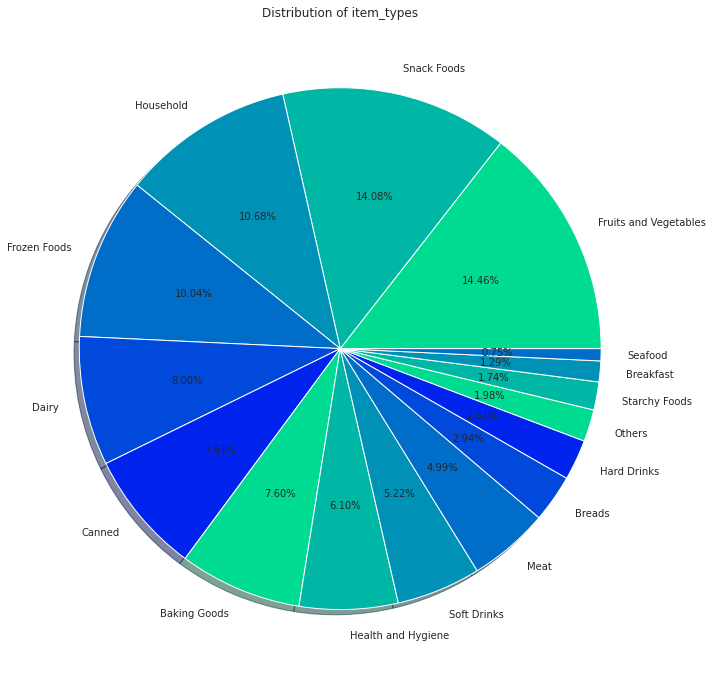

In [99]:
plt.figure(figsize=(20,12))
sns.set_style('darkgrid')
x = df['item_type'].value_counts()
labels = df['item_type'].value_counts().index
plt.pie(x,labels=labels,autopct='%.2f%%',data=df,
        colors= sns.color_palette('winter_r'),shadow=True
        )
plt.title('Distribution of item_types');

Inferences:
- As expected most people buy fruits and vegetables in the collected dataset
- followed by snack foods which is followed by Household items
- Least bought item in our dataset is seafood which is quite acceptable becuase most people like to buy meat items from a butcher rather than supermarket

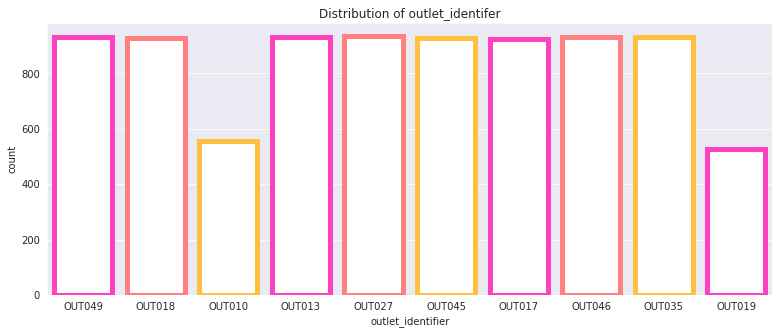

In [85]:
plt.figure(figsize =(13,5))
sns.countplot(df['outlet_identifier'],facecolor=(1,1,1,1),linewidth=5,edgecolor=sns.color_palette("spring", 3))
plt.title('Distribution of outlet_identifer');

Inferences:
- There is no clear distinction of which outlet had the most activity however the least is the outlet OUT010

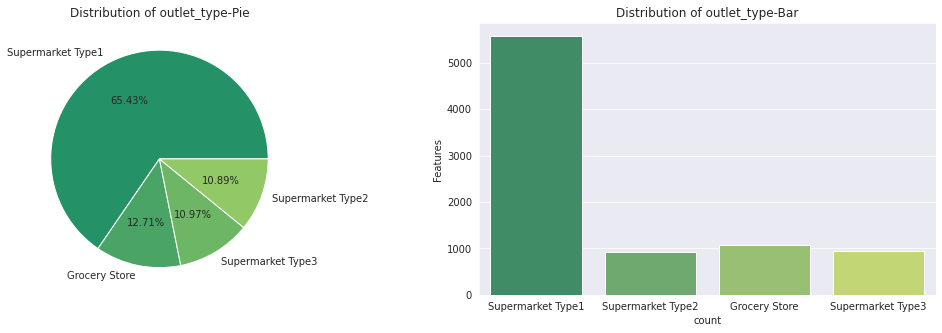

In [104]:
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.pie(df['outlet_type'].value_counts(),labels= df['outlet_type'].value_counts().index,data=df,
        autopct ='%.2f%%',
        colors =sns.color_palette('summer')
        )
plt.title('Distribution of outlet_type-Pie')

plt.subplot(1,2,2)
sns.countplot(df['outlet_type'],palette = 'summer')
plt.xlabel('count')
plt.ylabel('Features')
plt.title('Distribution of outlet_type-Bar');

Inferences:
- Supermarket type 1 seems to be the most preferred choice
- Supermarket type 2 being the least

#### Relation between the nominal variables and the item_outlet_sales

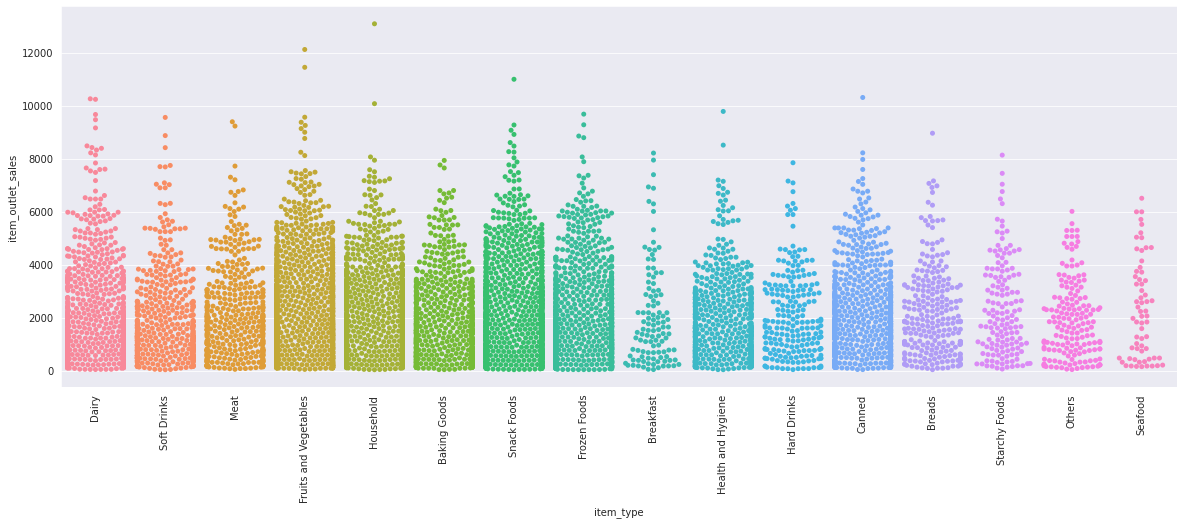

In [86]:
plt.figure(figsize=(20,7))
sns.swarmplot(x='item_type',y='item_outlet_sales',data=df)
plt.xticks(rotation='vertical');

Inferences:
- seafood contributes the least for the sales followed by breakfast
- fruits and vegetables and snackfoods contribute the highest for sales followed by Household

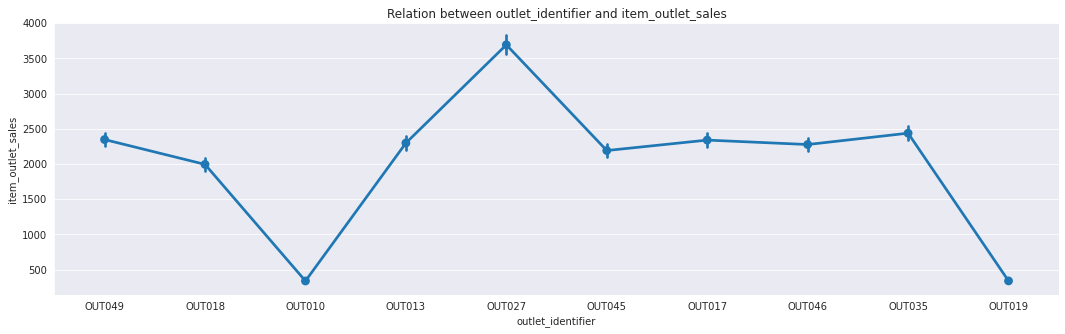

In [109]:
plt.figure(figsize=(18,5))
sns.pointplot(x='outlet_identifier',y='item_outlet_sales',data=df)
plt.title('Relation between outlet_identifier and item_outlet_sales');

Inferences:
- The outlet_sales was the highest for OUT027 followed by OUT013
- and OUT010 and Out019 seems be to tied up when taking the lowest

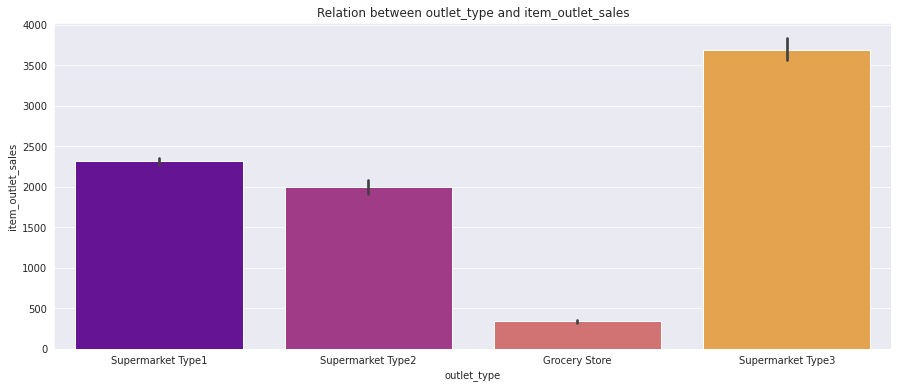

In [117]:
plt.figure(figsize=(15,6))
sns.barplot(x='outlet_type',y='item_outlet_sales',data=df,palette = 'plasma')
plt.title('Relation between outlet_type and item_outlet_sales');

Inferences:
- The highest sales happened for supermarket type 3 which comes as a surprise because in univariate analysis Supermarket type 1 seems to be the preferred one
- But when pit against the dependent variable Supermarket type 1 tops second
 - Grocery store seems to be the least one when taking sales into consideration

#### Let us go to next step which is Feature engineering after which we will also see what and all details we can find about our dataset